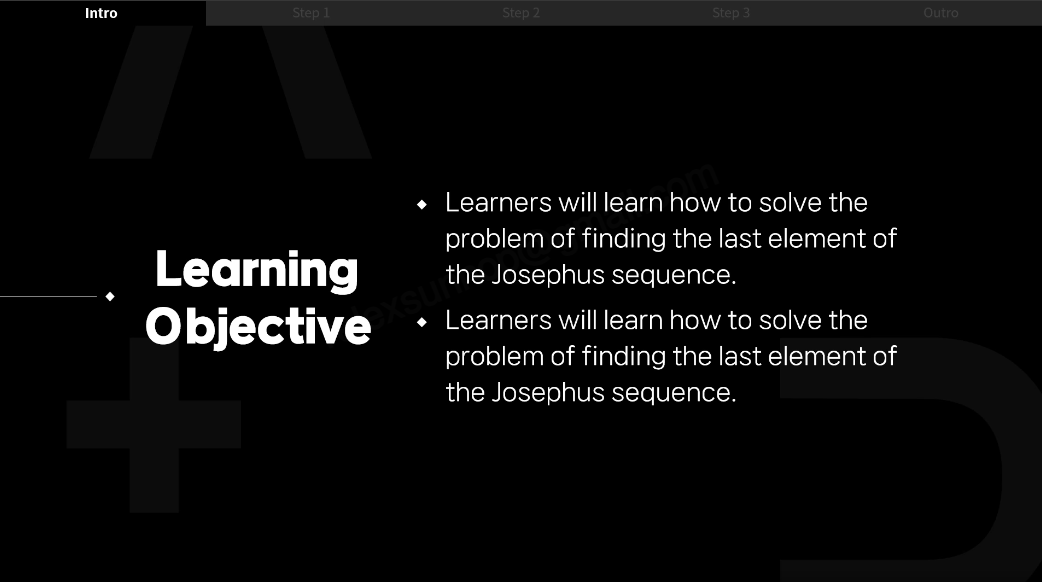

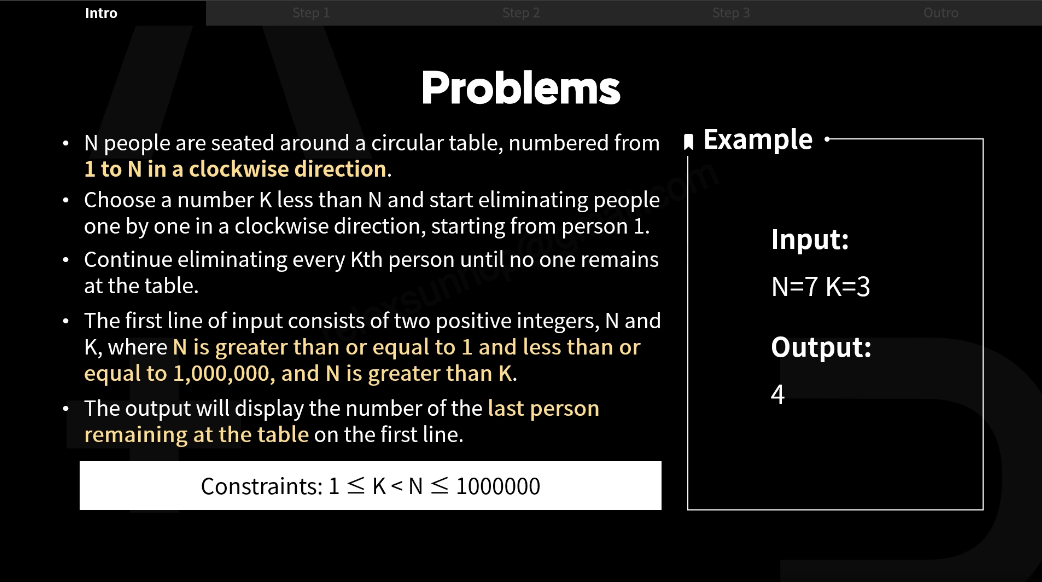

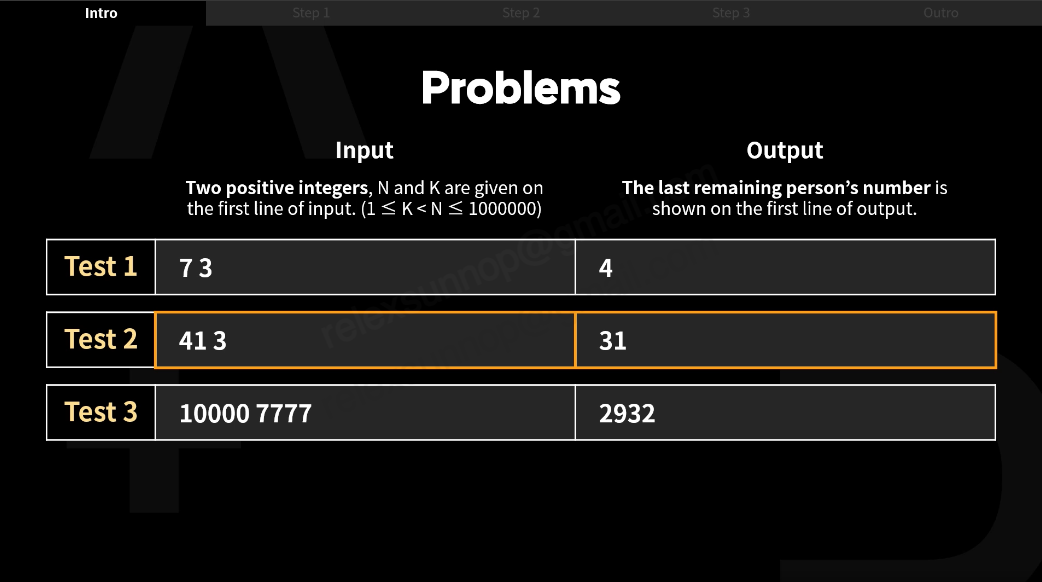

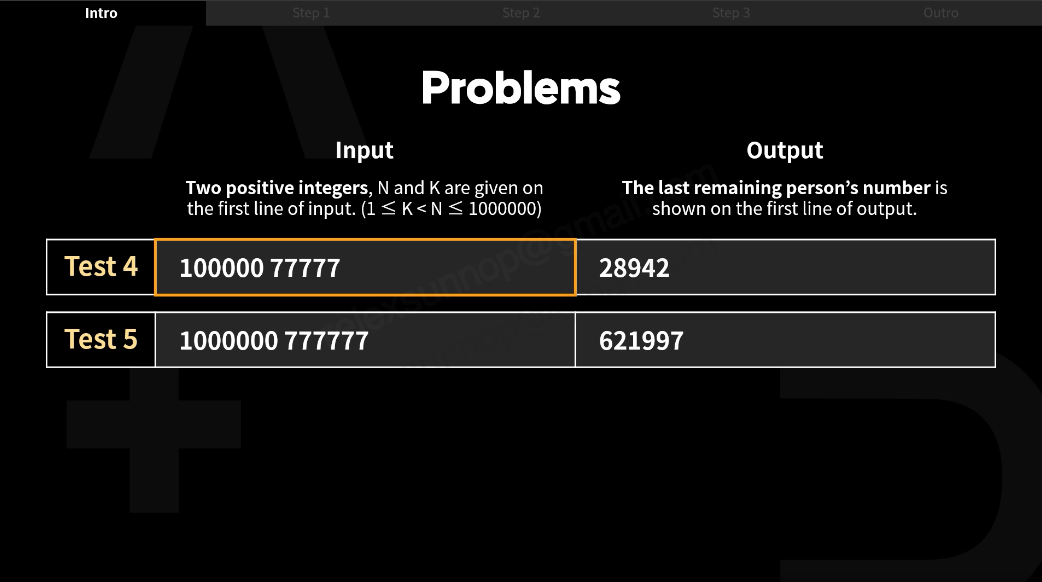

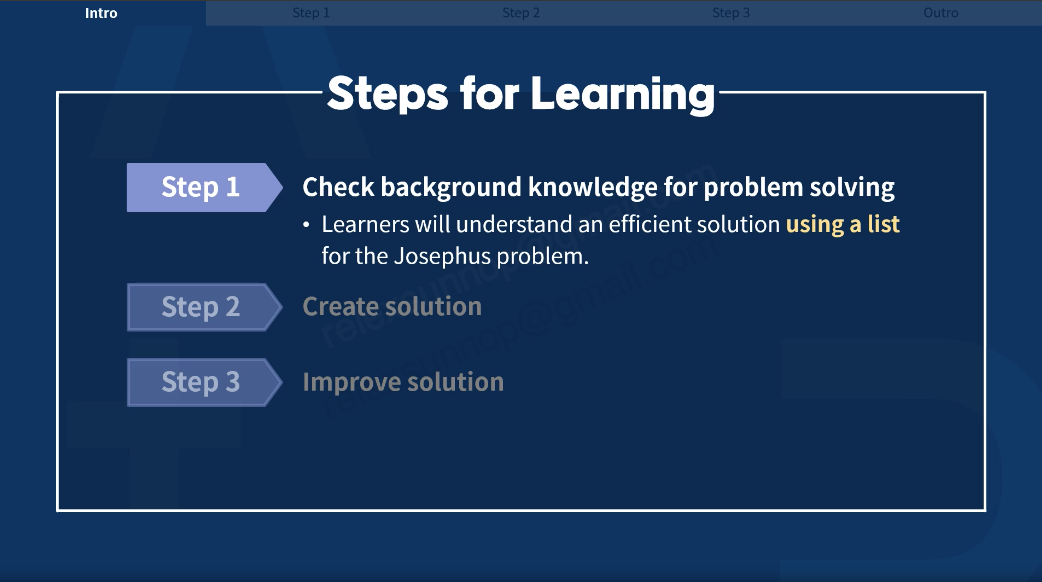

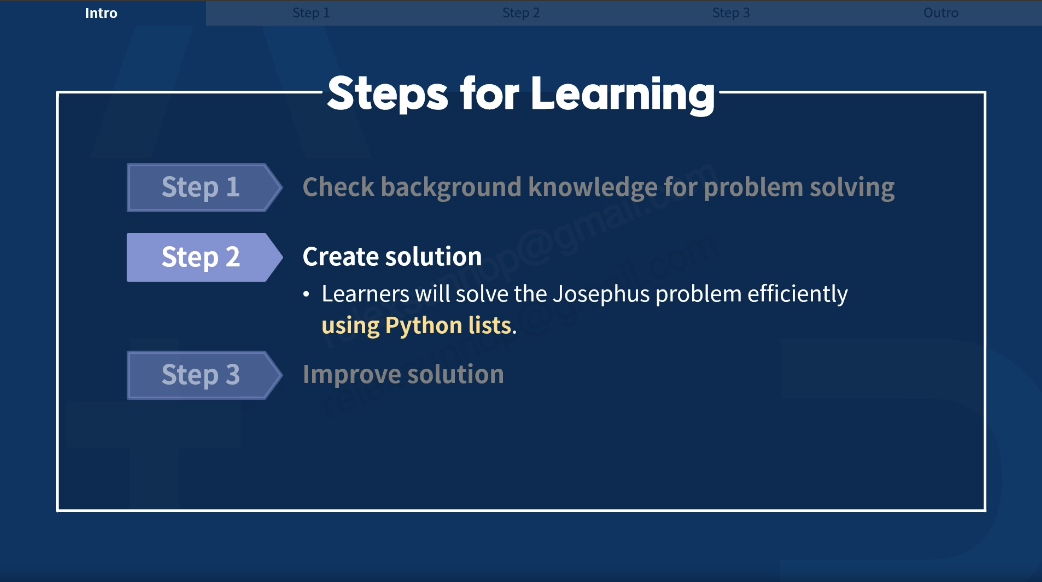

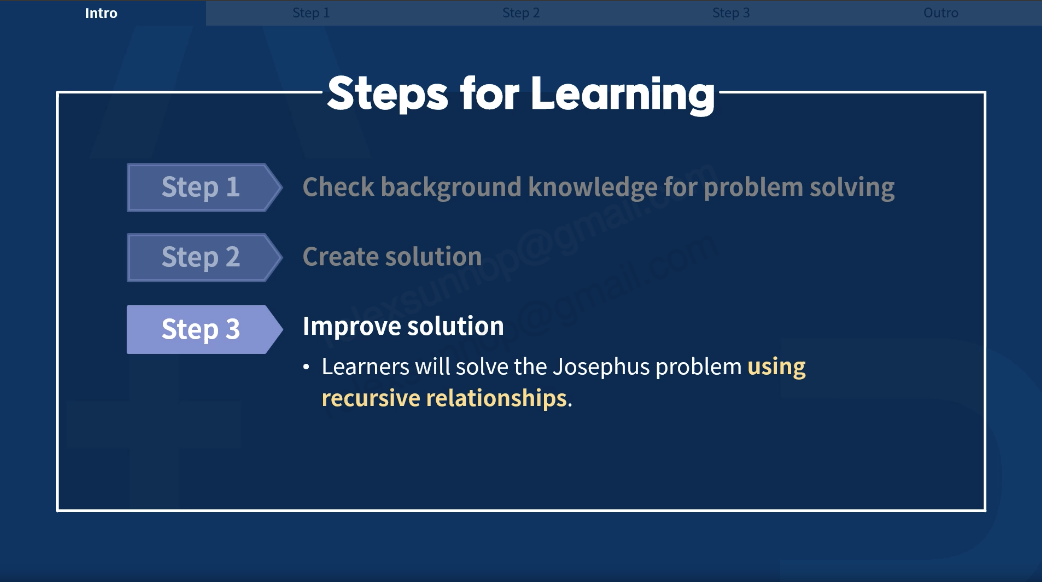

---

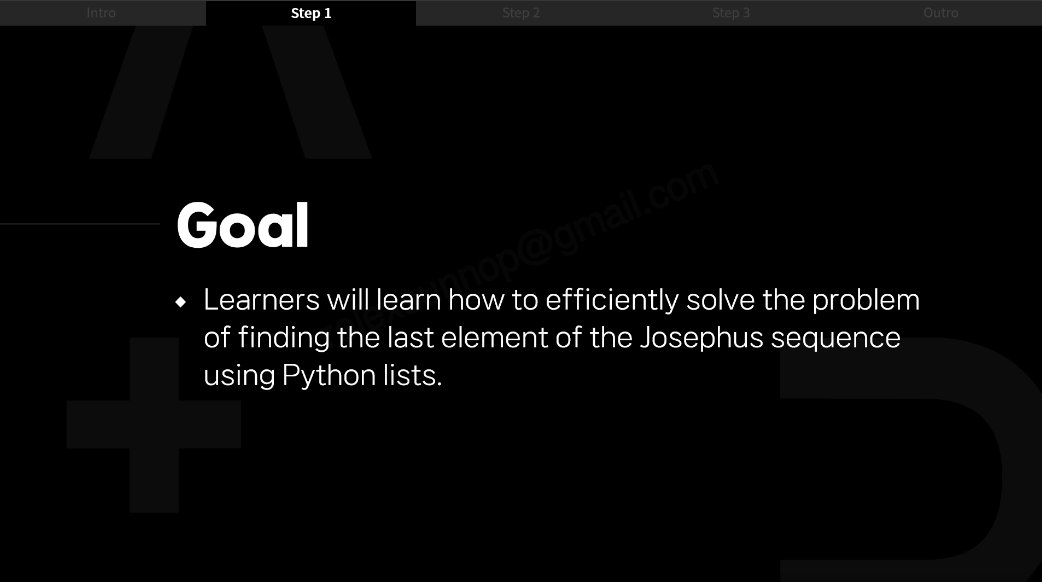

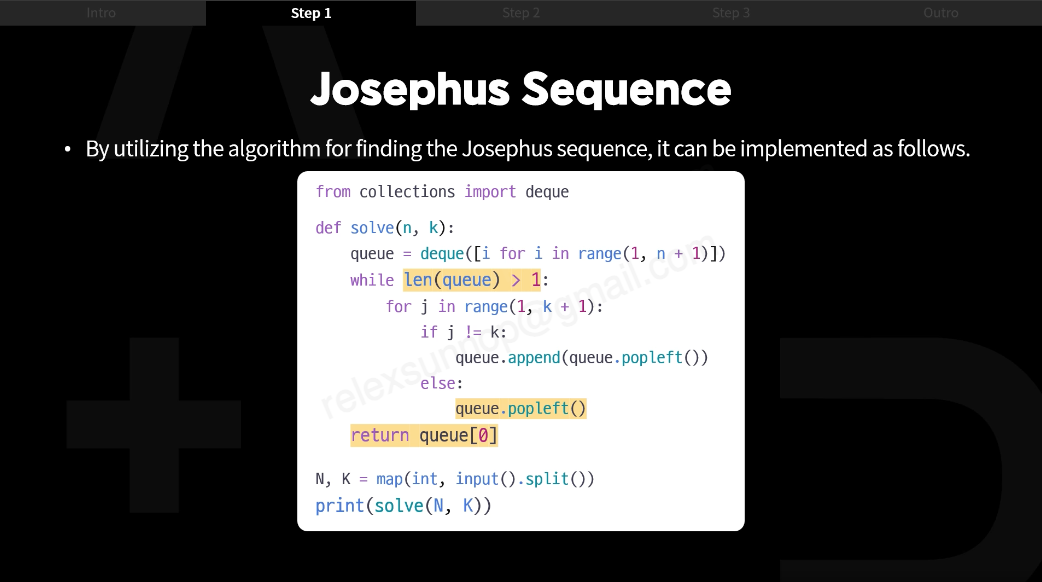

In [12]:
from collections import deque

def solve(n, k) :
    queue = deque([i for i in range(1, n+1)])
    while len(queue) > 1 :
        for j in range(1, k+1) :
            if j != k :
                queue.append(queue.popleft())
            else :
                queue.popleft()
    return queue[0]

N, K = map(int, input().split())
print(solve(N, K))

 41 3


31


## Improving Perfomance of Josephus Problem with Lists

- The solution to the Josephus problem using a queue is
    - inefficient because deletions and additions from the queue occur frequently.
- Therefore, performance can be improved by using a method that
    - deletes the Kth element from the list.
 

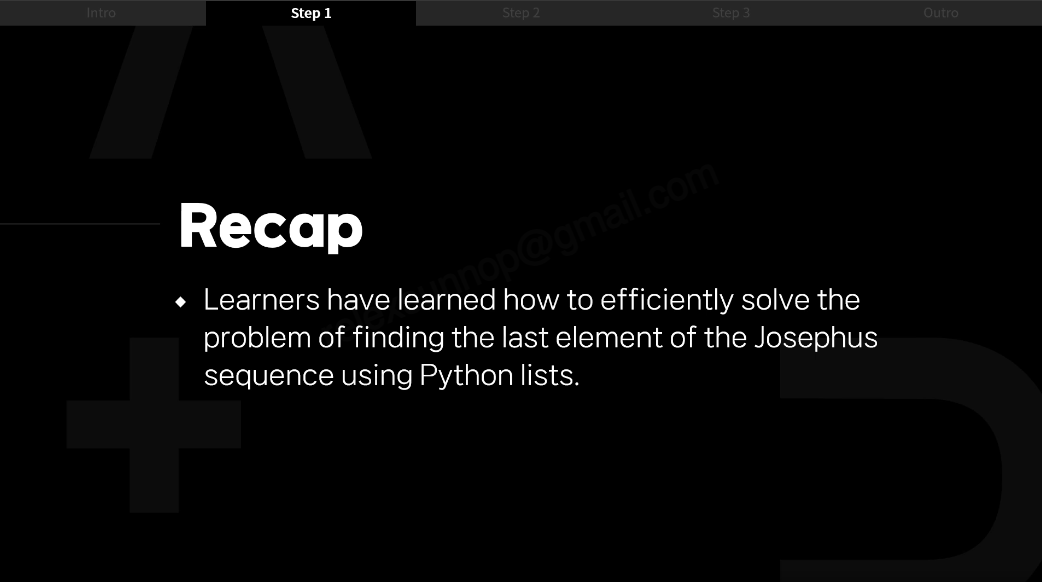

---

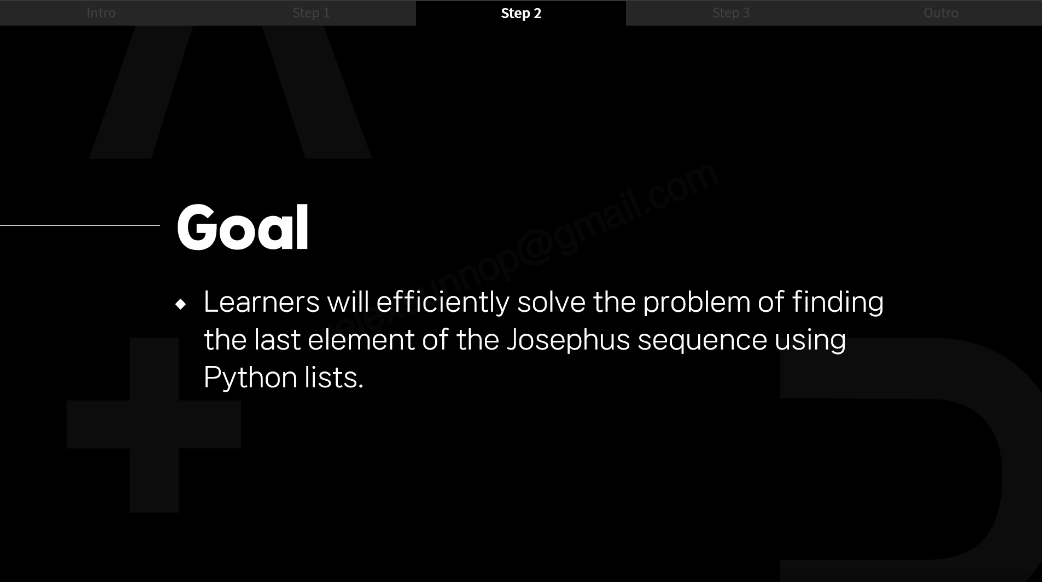

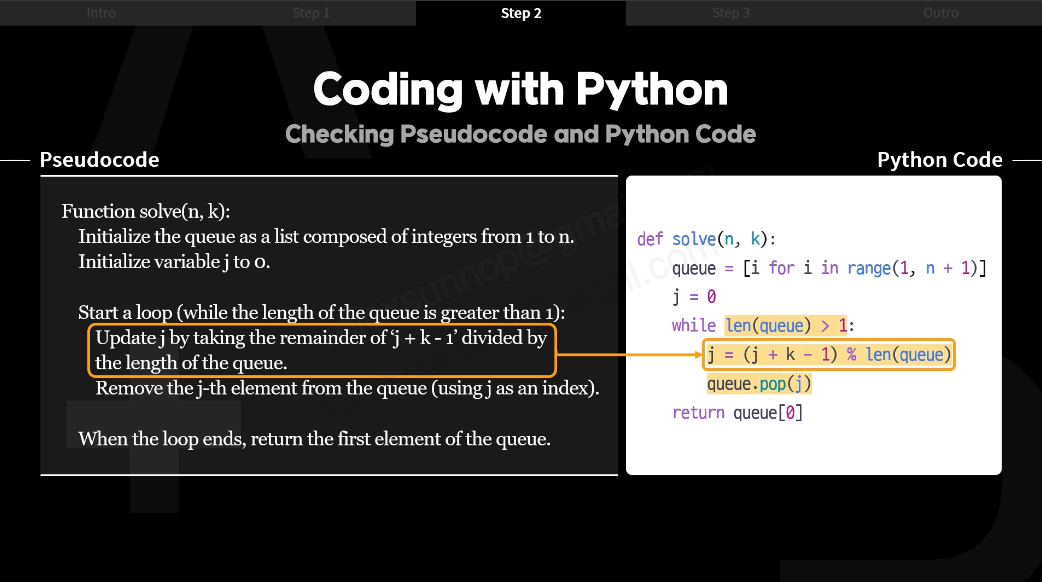

In [15]:
def solve(n, k) :
    queue = [i for i in range(1, n + 1)]
    j = 0
    while len(queue) > 1 :
        j = (j + k -1) % len(queue)
        queue.pop(j)
    return queue[0]

N, K = map(int, input().split())
import time
start = time.time()
print(solve(N, K))
end = time.time()
print(f'solve() elapsed time: {end - start}')

 1000000 777777


621997
solve() elapsed time: 35.39961814880371


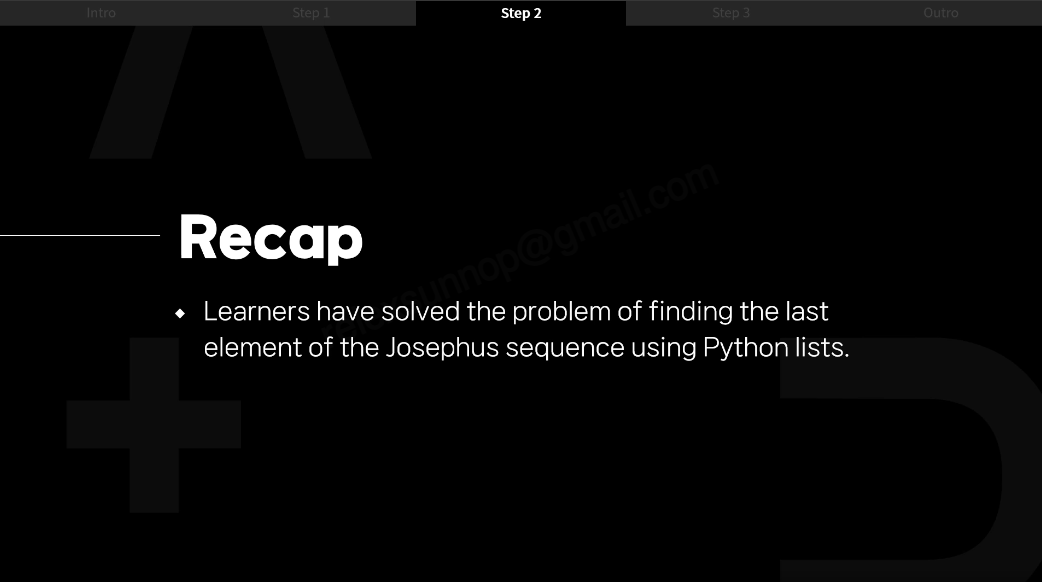

---

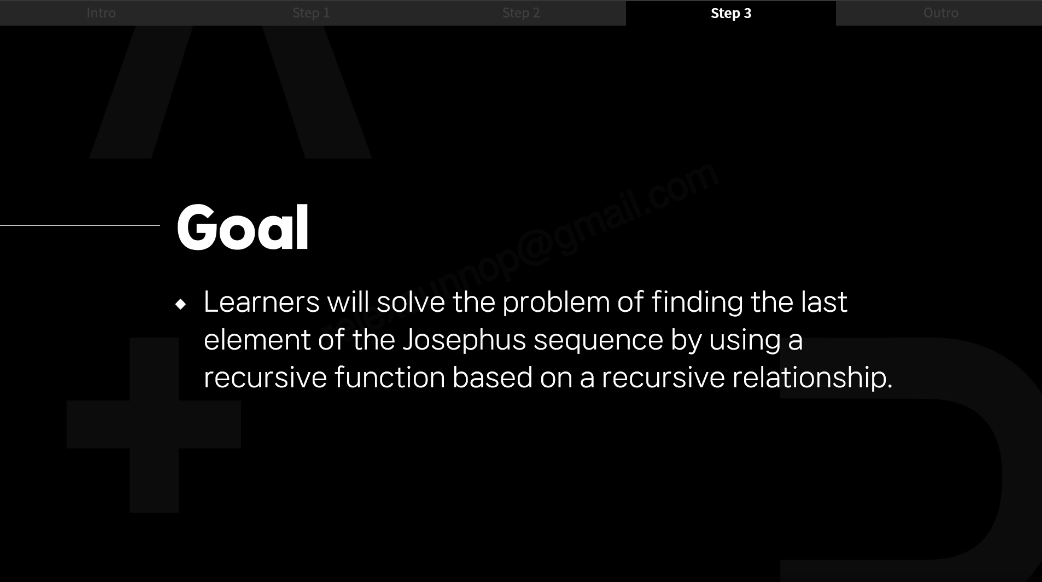

## Solution improvement stradegy 1

Analysis of the recursive relationship of the Josephus problem.
- f(n, k): The number of the survivor when n and k are given.
    - After excluding the k-th person, there are n-1 people remaining.
    - The starting position of the next game is (k%n) + 1
- f(n-1, k): The number of the survivior when the remaining n-1 people remove the k-th person.

> f(1, k) = 1
> 
> f(n, k) = (f(n - 1, k) + k - 1) % n + 1 

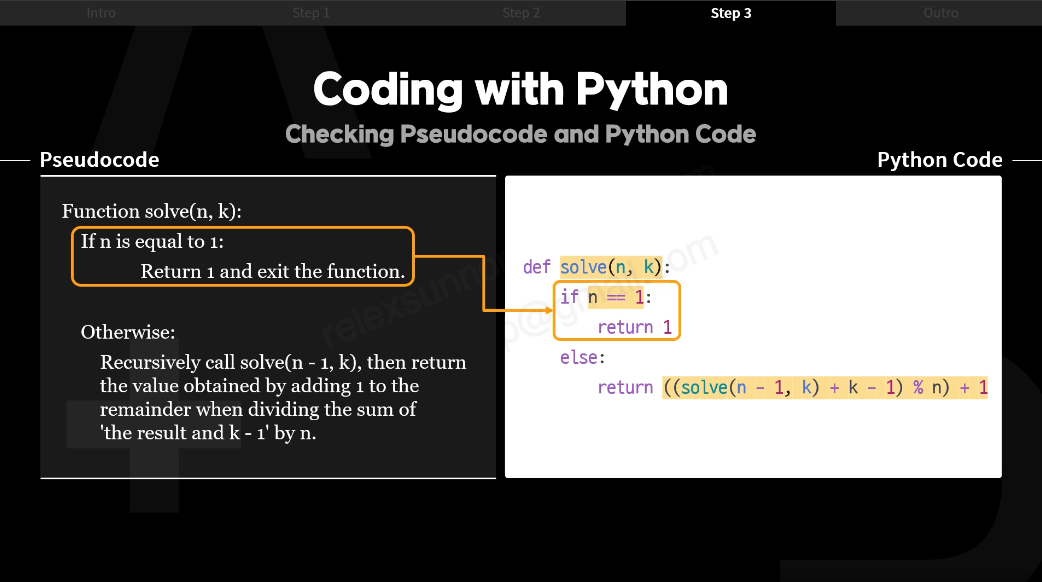

In [21]:
import sys
sys.setrecursionlimit(10**7)

def solve(n, k) :
    if n == 1 :
        return 1
    else :
        return ((solve(n - 1, k) + k - 1) % n) + 1

N , K = map(int, input().split())
import time
start = time.time()
print(solve(N, K))
end = time.time()
print(f'solve() elapsed time: {end - start}')

 10000 7777


2932
solve() elapsed time: 0.02137017250061035


<span style="color: red">Note</span>: Limiting the depth of recursive calls in Python
- Typically set to a few thousand times.
- Therefore, it can be a problem when handling deep recursive calls.

<span style="color: red">Note</span>: The sys module and the sys.setrecursionlimit function
- Increase Python's recursion limit.

<span style="color: red">Note</span>: sys.setrecursionlimit(10**7) means
- Increase the recursion limit to ten million.
- This allows for handling deeper recursive calls.

## Solution improvement stradegy 2

- Recursive implementation of the Josephus problem
    - Due to n recursive calls, if excessively consumes the function call stack.
- Therefore, it is decided to implement the recursive function as a loop to improve performance.

> f = 1

> f = (f + k - 1) % n + 1


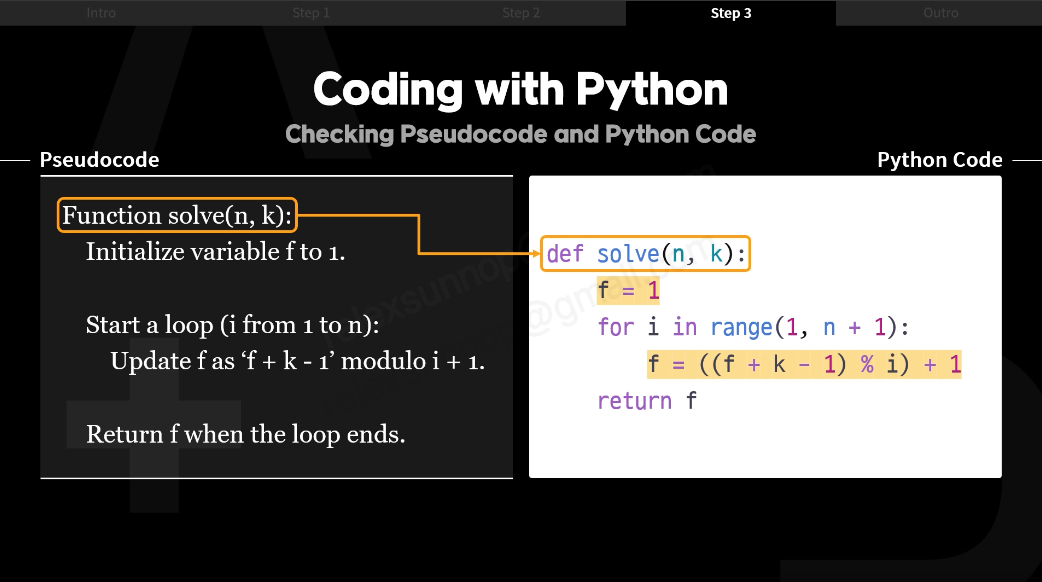

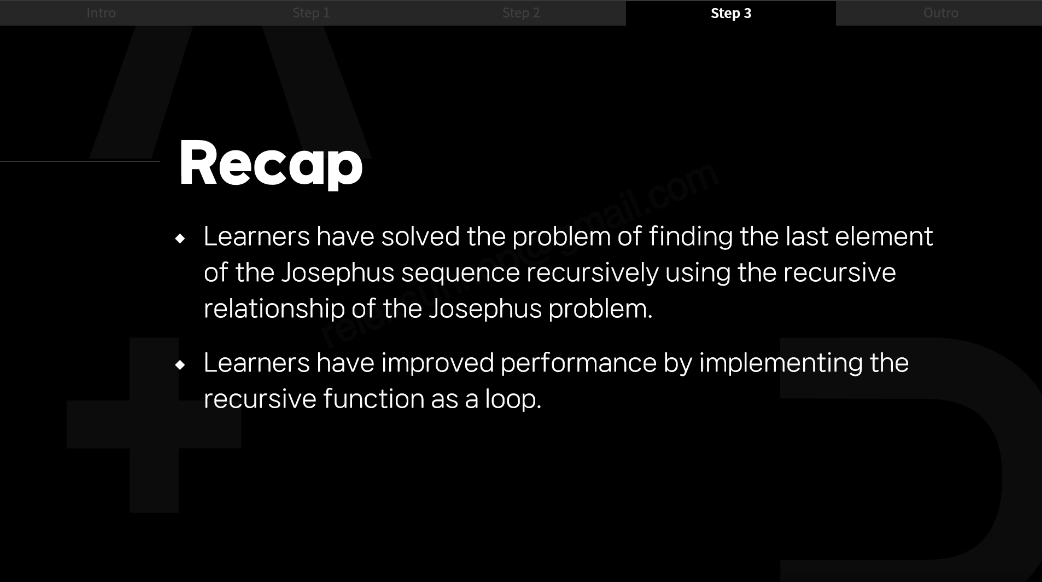

----

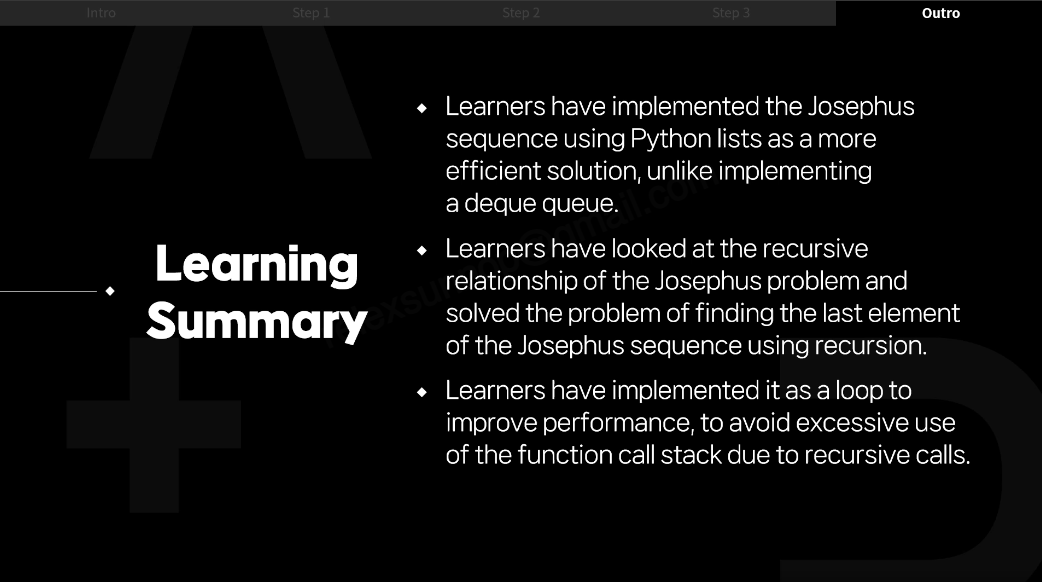